In [3]:
#import requirements
from datetime import date
import pandas as pd 
import matplotlib.pyplot as plt

FILENAME = 'Dataset/covid19_tweets.csv'
df = pd.read_csv(FILENAME)

#Transformas la data
df["user_name"] = df['user_name'].astype('string')
df["user_location"] = df['user_location'].astype('string')
df["user_description"] = df['user_description'].astype('string')
df["user_created"] = df['user_created'].astype('datetime64[ns]')
df["date"] = df['date'].astype('datetime64[ns]')

#Limpiamos strings
df["user_name"] = df['user_name'].str.lstrip()
df["user_location"] = df['user_location'].str.lstrip()
df["user_description"] = df['user_description'].str.lstrip()

#limpiamos NA
#df = df.dropna(axis = 0)

In [4]:
#- Crea una función que se encargue de mostrar cuántos tweets por ciudad han sido publicados

def agrupa_ubicacion_geografica(df):
    df_agrupado = df.groupby(['user_location']).size().reset_index(name="count")
    df_ordenado = df_agrupado.sort_values(['count'],ascending=[False])
    return df_ordenado

tweets_por_ciudad = agrupa_ubicacion_geografica(df)
print(f'Tweets por ciudad \n{tweets_por_ciudad}')

Tweets por ciudad 
                        user_location  count
9489                            India   3503
21544                   United States   2258
14346                New Delhi, India   1627
13619                   Mumbai, India   1296
22342                  Washington, DC   1270
...                               ...    ...
14407                  New Jersey USA      1
14408           New Jersey USA .....       1
14410           New Jersey and Beyond      1
14411  New Jersey, Home of the Devils      1
14373               New Delhi/Kolkata      1

[25602 rows x 2 columns]


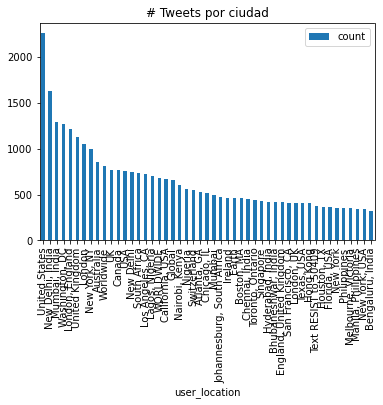

In [5]:
#- Crea una función que se encargue de mostrar una gráfica de barras con la información obtenida de la función anterior.
def grafica_ubicación_geografica(df_in002):
    df_in002.plot(kind='bar',x='user_location',y='count', title = '# Tweets por ciudad')
    return plt.show()

grafica_ubicación_geografica(tweets_por_ciudad.iloc[1:50,:])